# Reconocimiento/ Clasificación de vocales Naive Bayes

* Dado un archivo de audio de una vocal, el sistema debe identificar la vocal.

* Búsqueda o grabación de los archivos de audio, conjunto de señales de entrenamiento y
conjunto de señales de test. Cada conjunto debe estar compuesto por diferentes grabaciones
de las 5 vocales. Encontrará ejemplos de audios en AV.

* Representación de algunos de los archivos de audio en el dominio temporal y en el dominio
frecuencial.

* Se deben seleccionar y extraer características representativas de cada una de las vocales.

* Se utilizará el clasificador Naive Bayes, las entradas del clasificador serán las características
extraídas de cada archivo de audio. La salida del clasificador será la vocal a la que pertenece
cada archivo de audio.

* El sistema tomará como entrada una señal de voz (archivo .wav) correspondiente a una
vocal y la salida será la vocal correspondiente.

* Se medirá el funcionamiento del sistema en un conjunto independiente de señales de test.

### Archivos de audio 

Los archivos de audio que se van a emplear están almacenados en las siguientes carpetas:
* Audios: archivos mono de audio .wav grabados en una cámara anecoica. Los nombres de los audios indican el tipo de vocal, su duración (L si es larga y C si es corta) y quien la pronuncia (Y => Yuriy, D => David y F => Hao).
* vocals: archivos mono de audio .wav extraidos del Aula Virtual (AV).

## Representaciones en tiempo y frecuencia

/tmp/ipykernel_920570/3321359296.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (12,10))


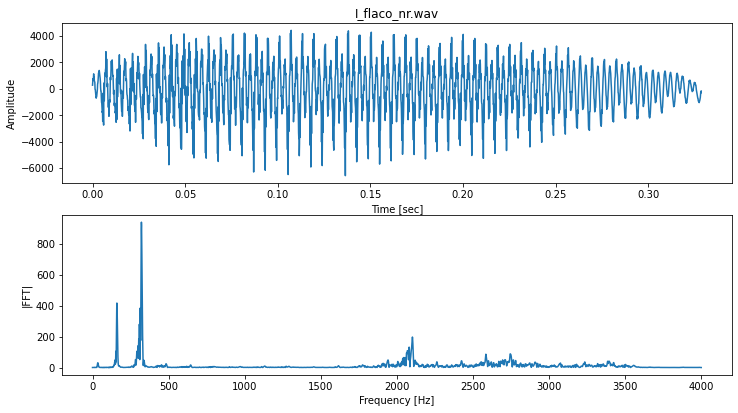

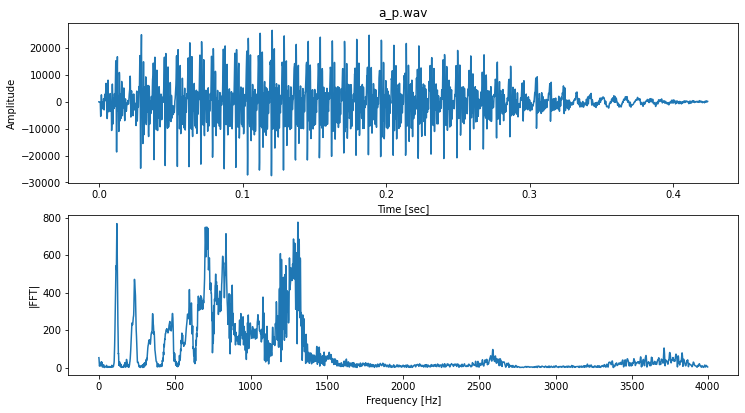

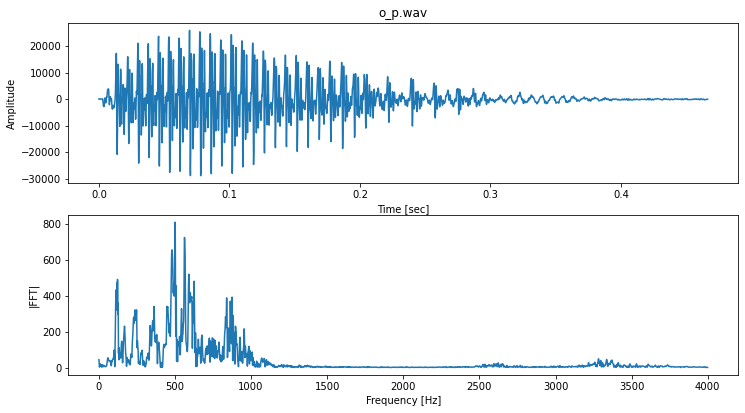

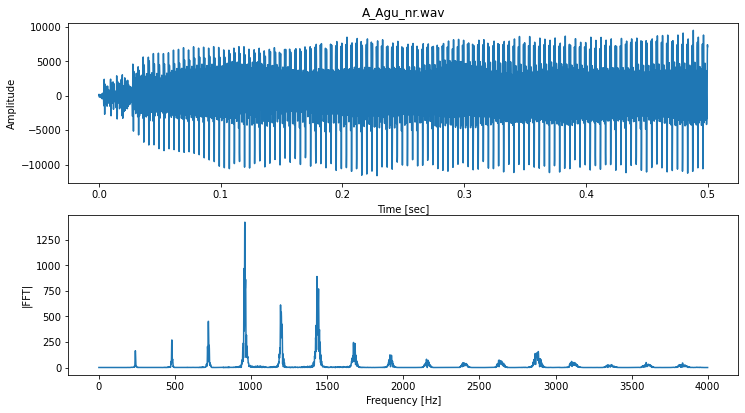

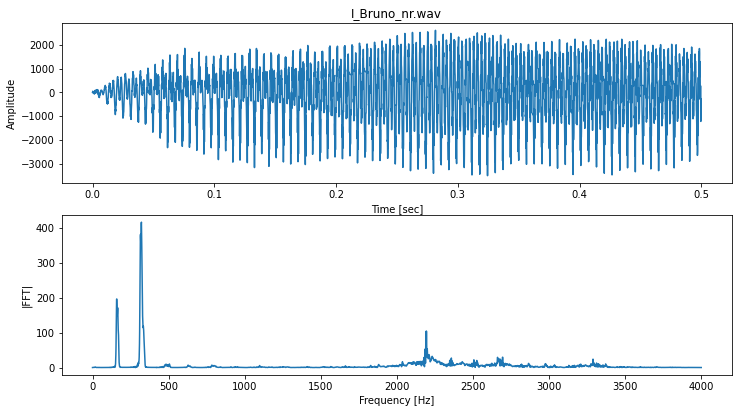

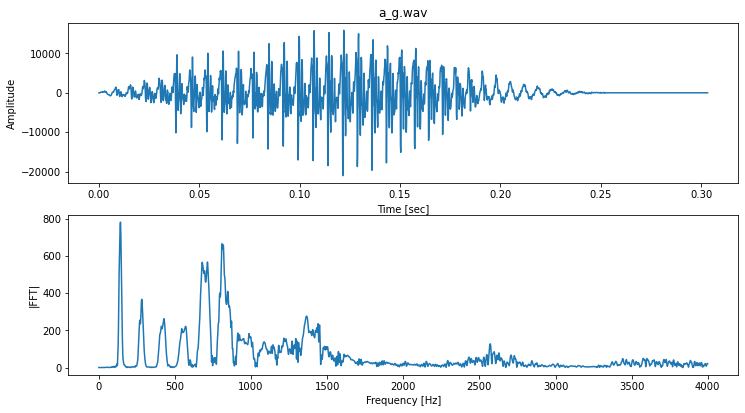

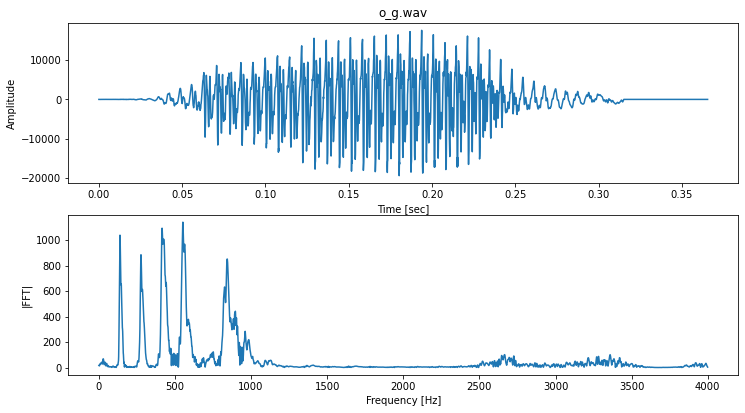

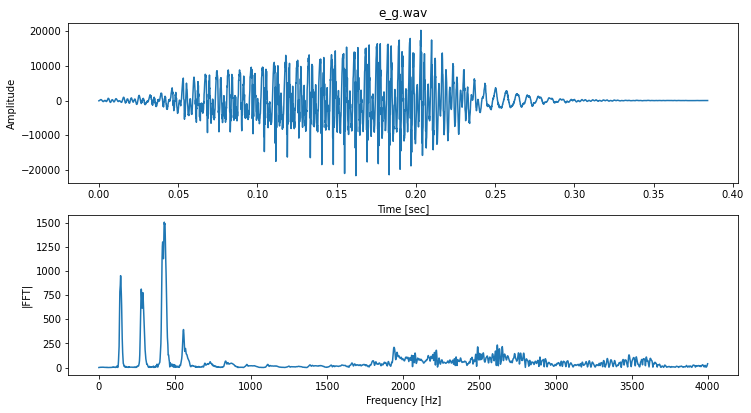

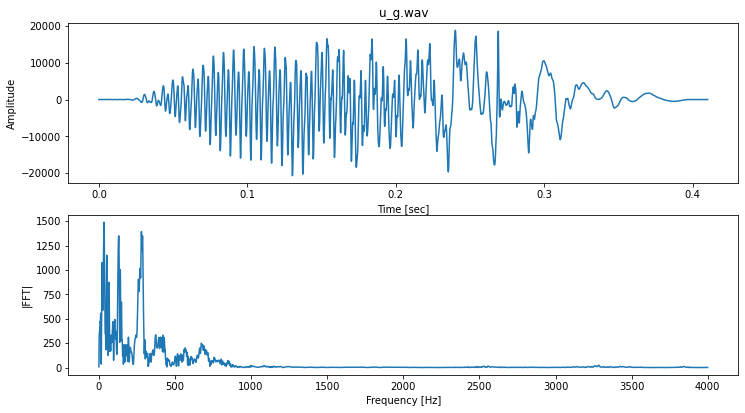

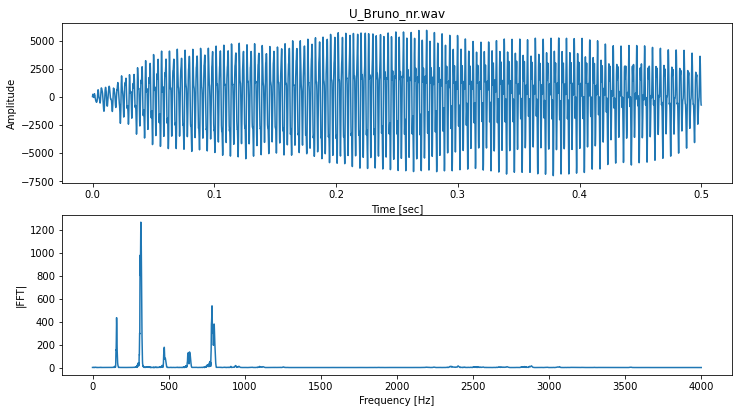

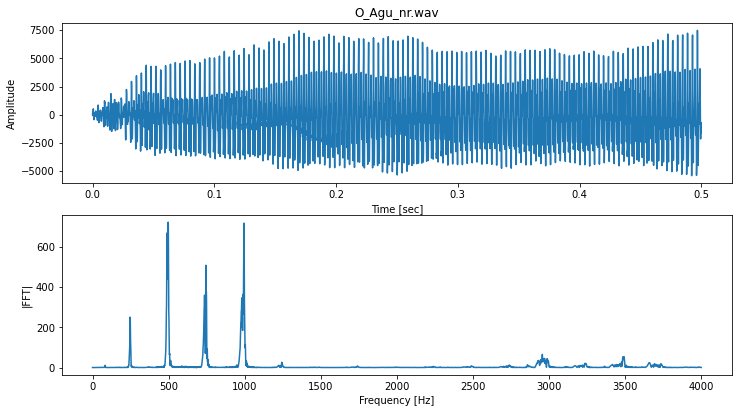

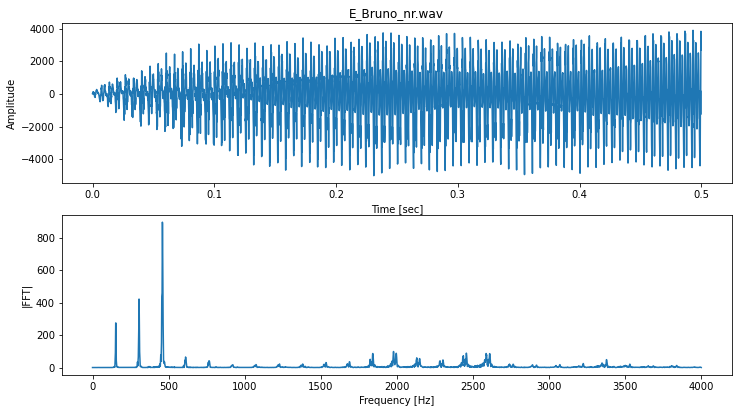

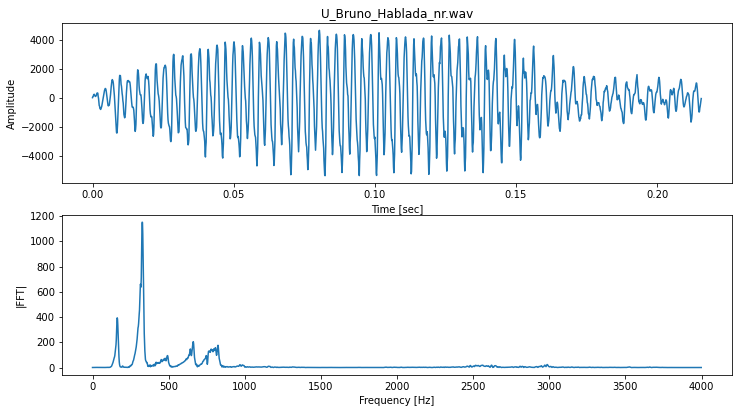

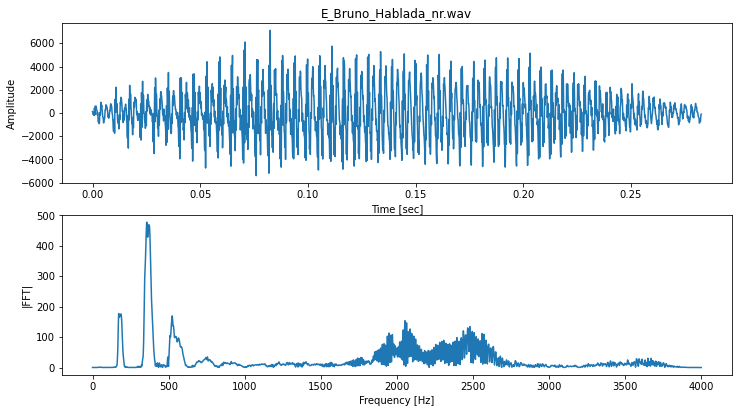

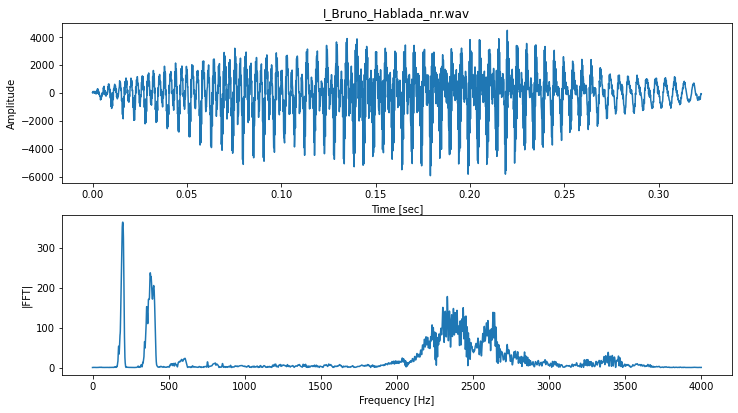

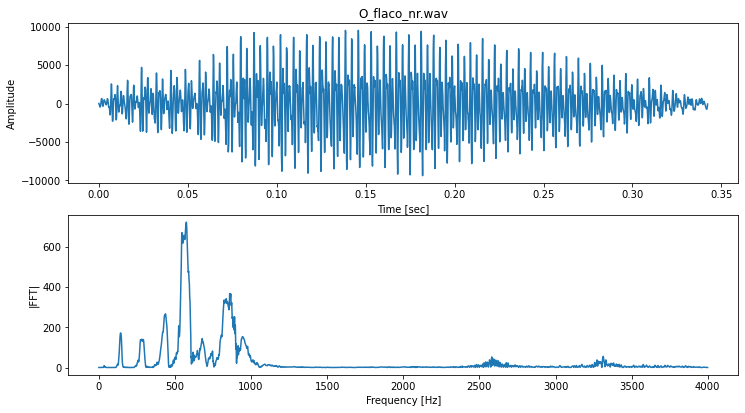

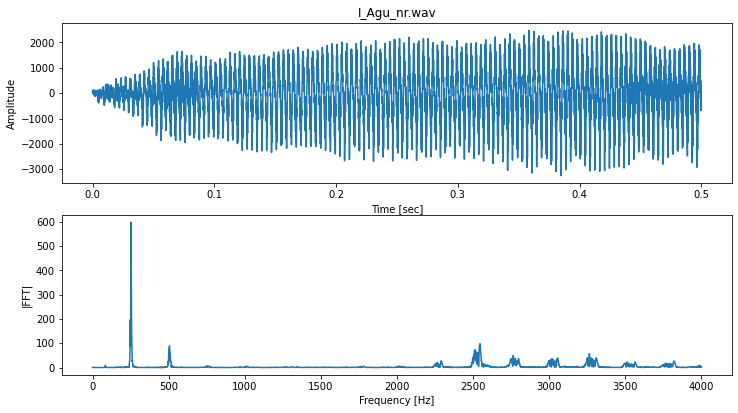

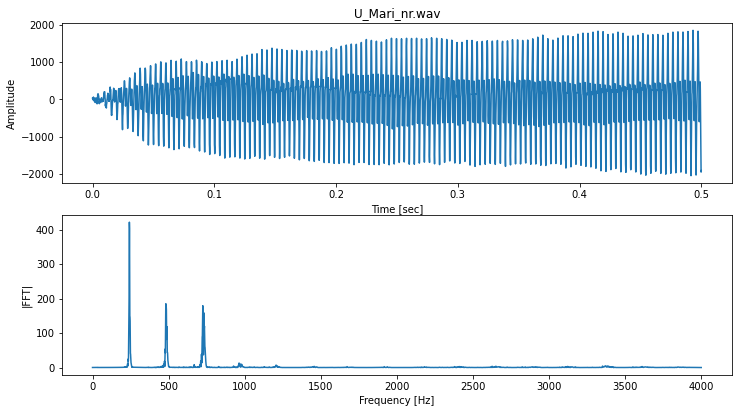

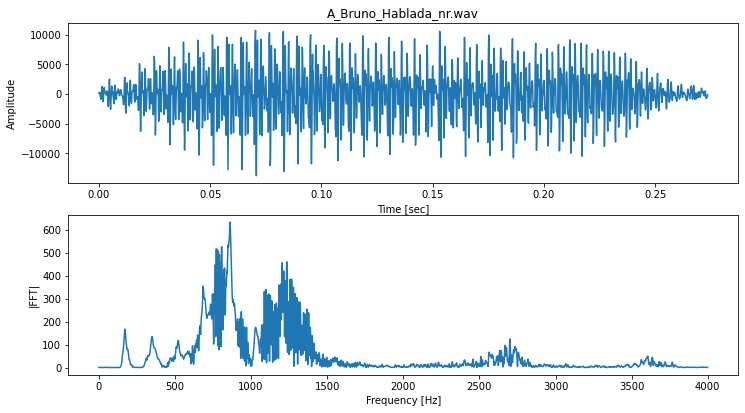

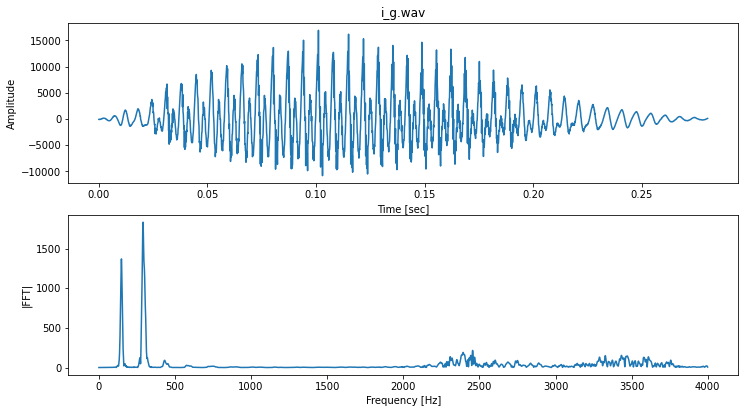

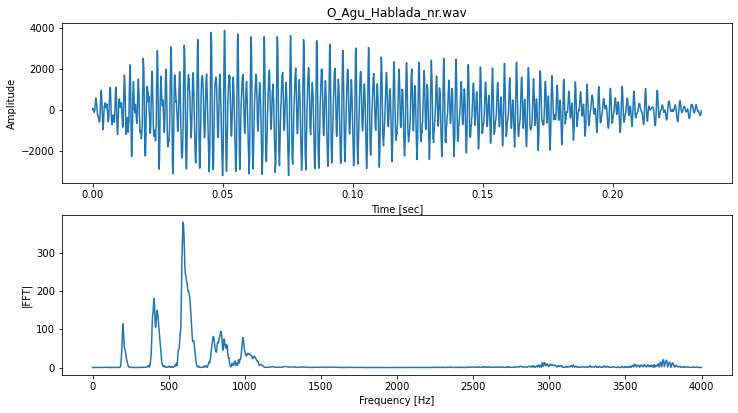

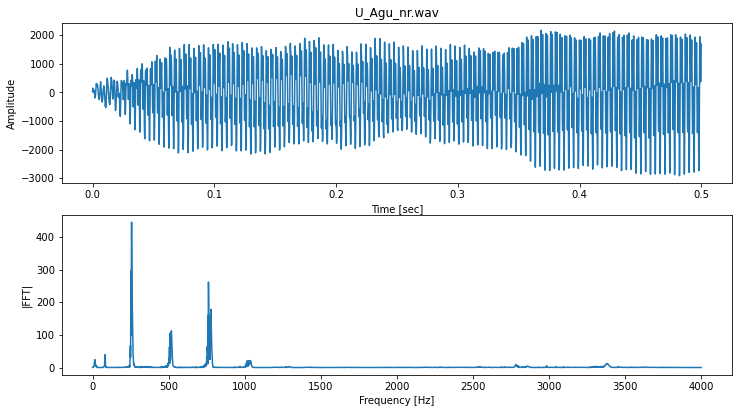

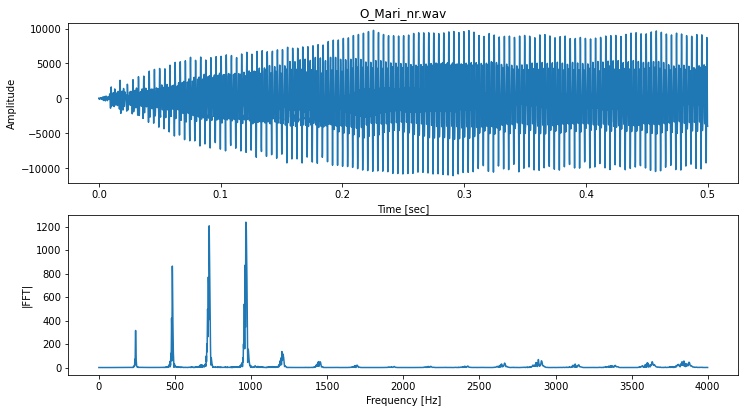

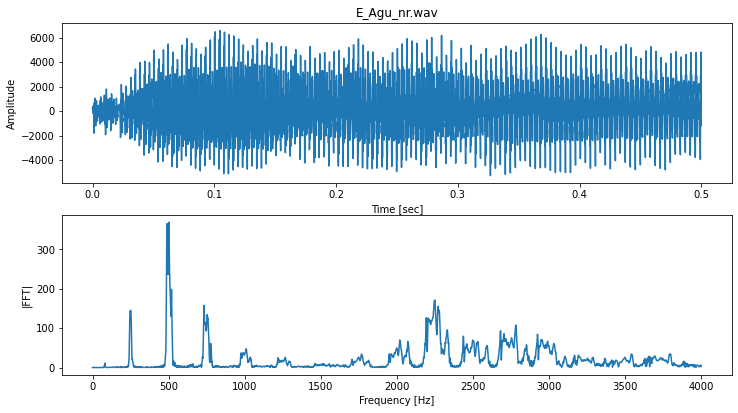

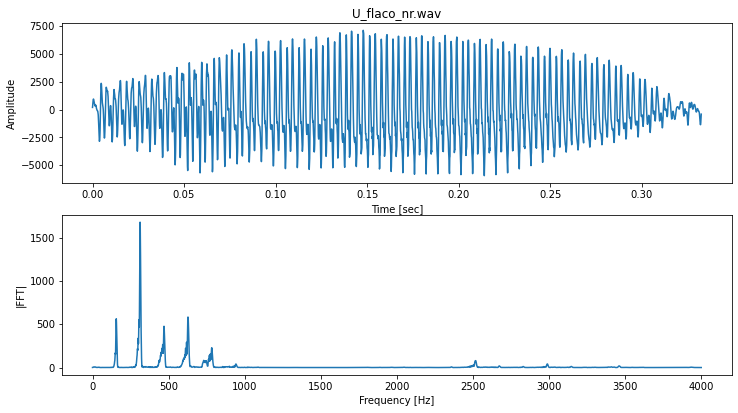

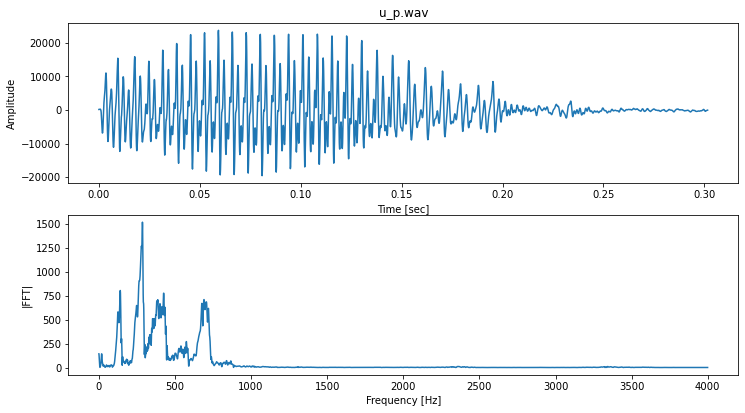

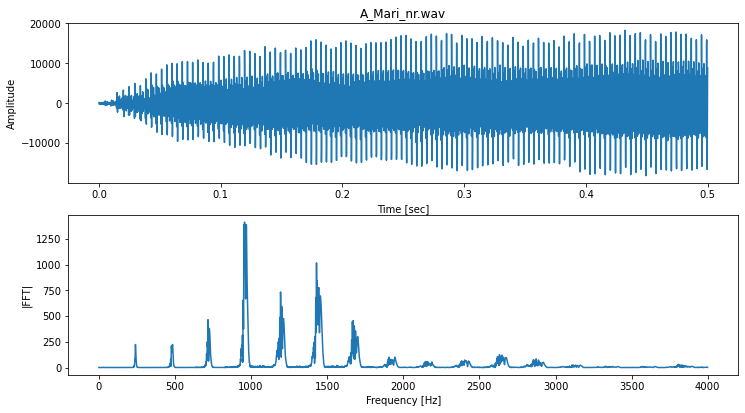

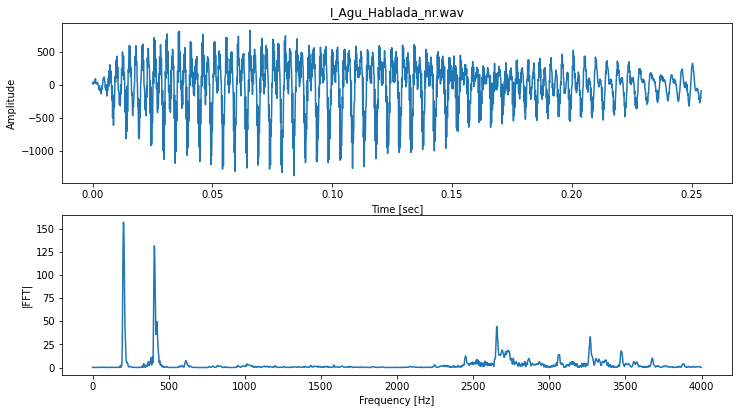

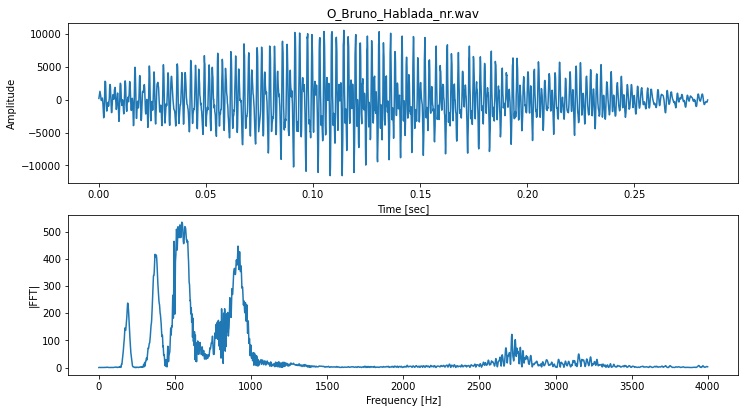

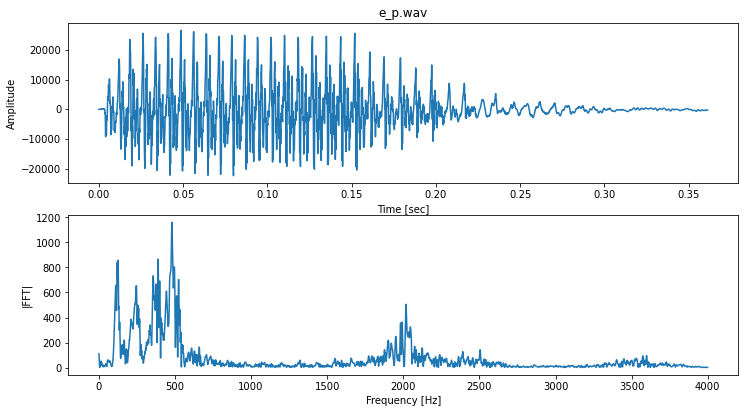

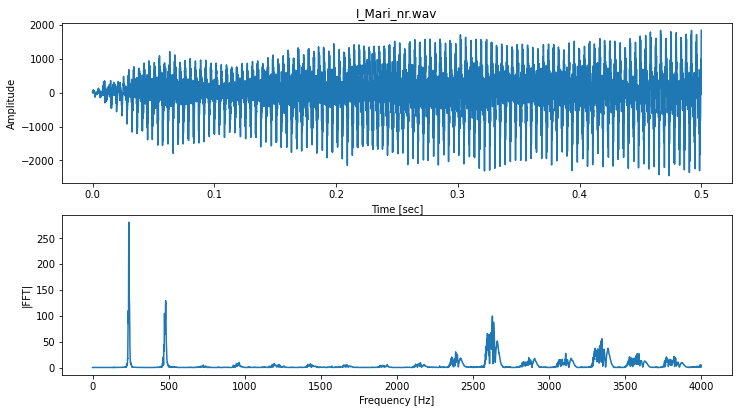

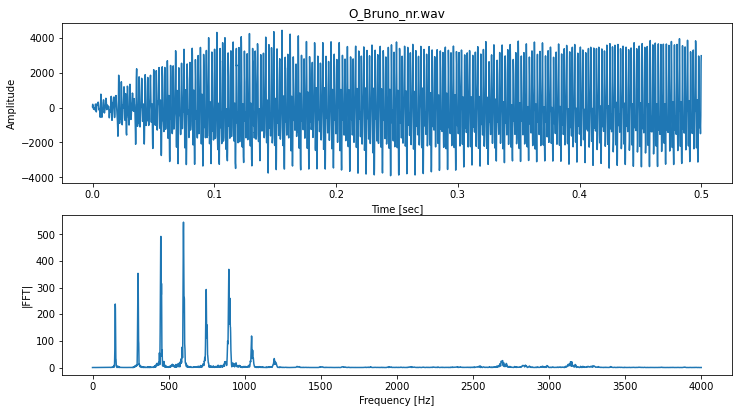

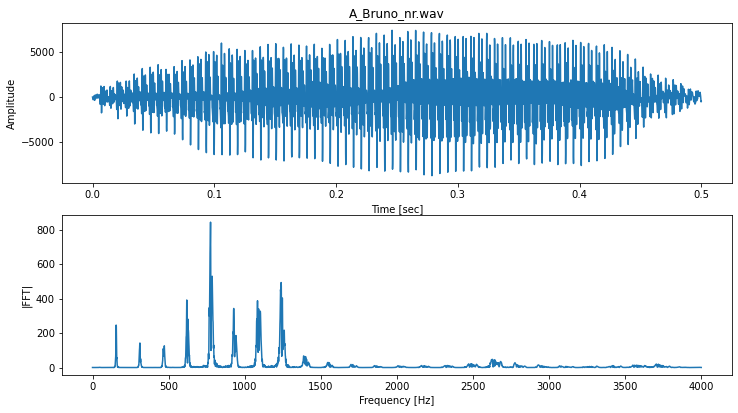

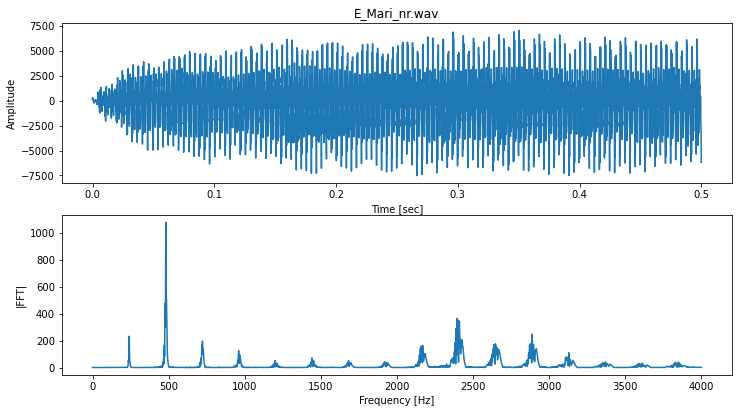

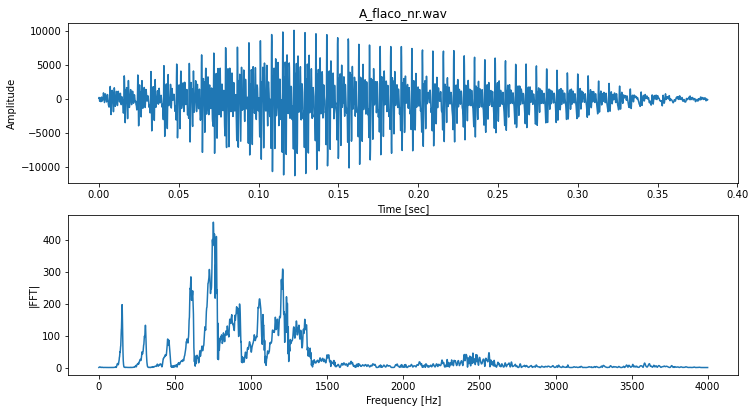

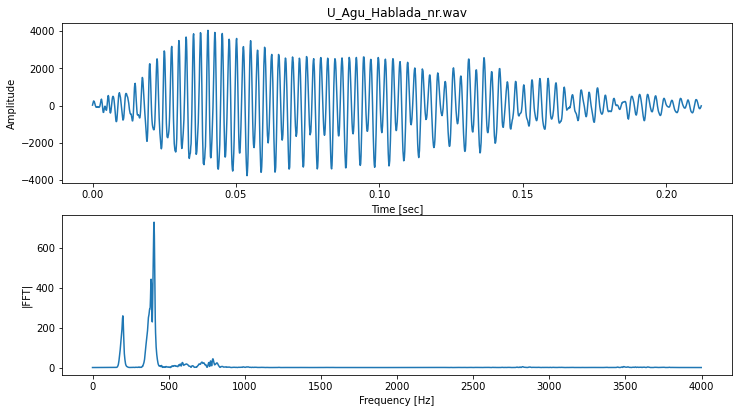

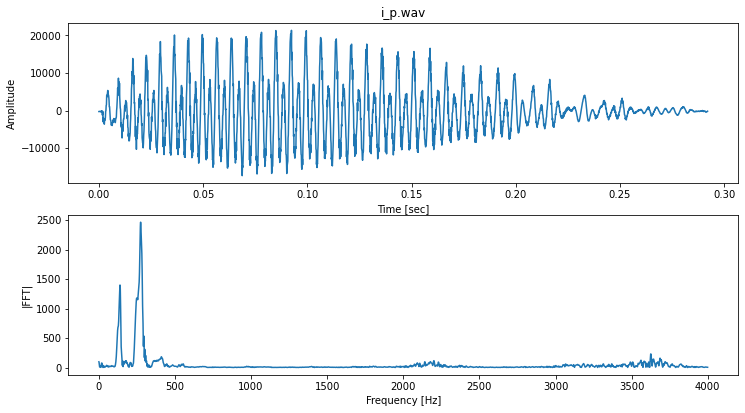

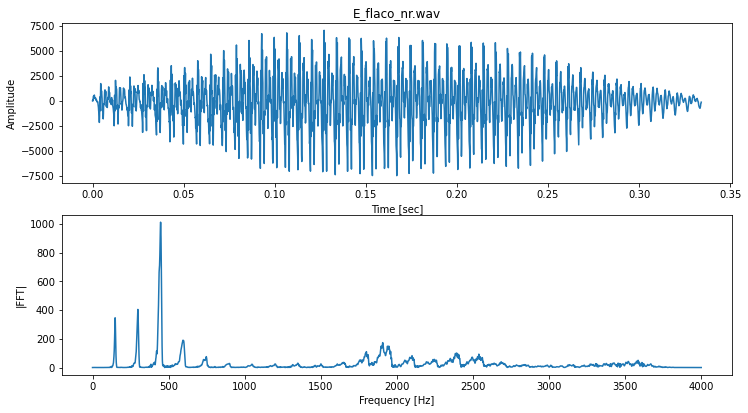

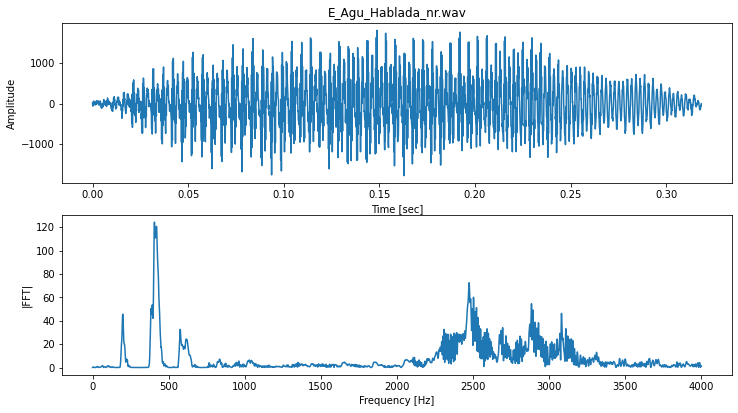

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
import os
import sys
from tds_utils_22 import my_spectra
import scipy.io.wavfile as wf


audio_file_train = os.listdir('vocals') 


for audio in audio_file_train:
    
        #reading wave files
        audio_path = os.path.join('vocals', audio)


        fs,y = wf.read(audio_path)
        trama= y[0:4000]
        t = np.arange(0,len(trama)/fs,1/fs)


        #plot signals
        plt.figure(figsize = (12,10))

        plt.subplot(3,1,1)
        plt.plot(t,trama)
        plt.xlabel('Time [sec]')
        plt.ylabel('Amplitude')
        plt.title(audio)

        psd,f = my_spectra(trama,fs)

        #plot positive frequencies

        idx = f>=0


        plt.subplot(3,1,2)
        plt.plot(f[idx],psd[idx])
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('|FFT|')

## MFCC

### Train Vowels

Función para extraer los MFCC de los audios proporcionados en el AV.
* Se sacan 13 coeficientes de Mel debido a que poseen la mayor parte de la información de la señal, como de la envolvente expectral o de las formantes.
* La función reduce se aplica para hacer la media de todas las ventanas de cada coeficiente y así tener un solo valor númerico por coeficiente.

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
import os


audio_file_train = os.listdir('vocals')

# Train
def mfcc_train():
    mffc_train = []
    vocals_train = []

    for audio in audio_file_train:
        audio_path = os.path.join('vocals', audio)
        signal, fs = librosa.load(audio_path)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=fs)
        mel = []
        for i in mfccs:
            mel_number = reduce(lambda x, y: x + y, i) / len(i)
            mel.append(mel_number)
            
        # Guardado de características
        mffc_train.append(mel)
        
              

        # Guardado de etiquetas
        vocal = audio.split('_')[0]
        if vocal == 'A' or vocal == 'a':
            vocals_train.append('a')
        if vocal == 'E' or vocal == 'e':
            vocals_train.append('e')
        if vocal == 'I' or vocal == 'i':
            vocals_train.append('i')
        if vocal == 'O' or vocal == 'o':
            vocals_train.append('o')
        if vocal == 'U' or vocal == 'u':
            vocals_train.append('u')

        #visualize MFCCs
#         plt.figure(figsize=(10, 5))
#         librosa.display.specshow(mfccs, x_axis='time', sr=fs)
#         plt.colorbar(format="%+2f")
#         plt.title(vocal)
#         plt.show()

    mfcc_train = np.array(mffc_train)
    vocals_train = np.array(vocals_train)

    return mfcc_train, vocals_train

### Test Vowels

Función para extraer los MFCC de los audios grabados por nosotros en la cámara anecoica.
* Se sacan 13 coeficientes de Mel debido a que poseen la mayor parte de la información de la señal, como de la envolvente expectral o de las formantes.
* La función reduce se aplica para hacer la media de todas las ventanas de cada coeficiente y así tener un solo valor númerico por coeficiente.

In [3]:
audio_file_test = os.listdir('Audios')  # Audios grabados con nuestras voces


# Test
def mfcc_test():
    mfcc_test = []
    vocals_test = []

    for audio in audio_file_test:
        audio_path = os.path.join('Audios', audio)
        signal, fs = librosa.load(audio_path)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=fs)
        mel = []
        for i in mfccs:
            mel_number = reduce(lambda x, y: x + y, i) / len(i)
            mel.append(mel_number)
        mfcc_test.append(mel)   # Guardado de características

        # Guardado de etiquetas
        vocal = audio.split('_')[0]
        if vocal == 'A' or vocal == 'a':
            vocals_test.append('a')
        if vocal == 'E' or vocal == 'e':
            vocals_test.append('e')
        if vocal == 'I' or vocal == 'i':
            vocals_test.append('i')
        if vocal == 'O' or vocal == 'o':
            vocals_test.append('o')
        if vocal == 'U' or vocal == 'u':
            vocals_test.append('u')

    mfcc_test = np.array(mfcc_test)
    vocals_test = np.array(vocals_test)
    
    return mfcc_test, vocals_test


## LPC

### Train Vowels

Esta se trata de la función para extraer los LPC de los audios proporcionados desde el AV.
* El orden de los coeficientes, p = 10 por ser el óptimo al minimizar el error de predicción.
* La ventana de Hamming puede variar entre 30, 40 y 50 ms. Con estos valores se minimiza el error de predicción.

In [4]:
import sys
import scipy.signal as sig
from tds_utils import predlin
import scipy.io.wavfile as wf
import os
sys.path.append('../')


audio_file_train = os.listdir('vocals')


def lpc_train():
    lpc_train = []
    vocals_train = []

    for audio in audio_file_train:
        audio_path = os.path.join('vocals', audio)
        fs, y = wf.read(audio_path)

        # obtain frame s2
        s2 = y[0:240]
        # LPC order
        p = 10
        N = int(fs*0.03)    # length in samples
        h = sig.hamming(N)  # hamming window

        # Extracción y guardado de características
        lpc_coef = predlin(s2, p, h)
        lpc_train.append(lpc_coef.tolist())


        # Guardado de etiquetas
        vocal = audio.split('_')[0]
        if vocal == 'A' or vocal == 'a':
            vocals_train.append('a')
        if vocal == 'E' or vocal == 'e':
            vocals_train.append('e')
        if vocal == 'I' or vocal == 'i':
            vocals_train.append('i')
        if vocal == 'O' or vocal == 'o':
            vocals_train.append('o')
        if vocal == 'U' or vocal == 'u':
            vocals_train.append('u')

        # Gráfica de los coeficientes LPC
        # plt.title(n)
        # plt.show()

    lpc_train = np.array(lpc_train)
    vocals_train = np.array(vocals_train)


    return lpc_train, vocals_train

### Test Vowels

Esta se trata de la función para extraer los LPC de los audios grabados por nosotros en la cámara anecoica. 
* El orden de los coeficientes, p = 10 por ser el óptimo al minimizar el error de predicción.
* A la frecuencia extraída de los audios (48 KHz) se le resta 40 KHz para que la frecuencia sea igual que la de los audios de entrenamiento.
* La ventana de Hamming puede variar entre 30, 40 y 50 ms. Con estos valores se minimiza el error de predicción.


In [5]:
import sys
import scipy.signal as sig
from tds_utils import predlin
import scipy.io.wavfile as wf
sys.path.append('../')


audio_file_test = os.listdir('Audios')


def lpc_test():
    lpc_test = []
    vocals_test = []

    for audio in audio_file_test:
        audio_path = os.path.join('Audios', audio)
        fs, y = wf.read(audio_path)

        # obtain frame s2
        s2 = y[0:240]
        # LPC order
        p = 10

        N = int((fs-40000) * 0.03)  # length in samples
        h = sig.hamming(N)  # hamming window

        # Extracción y guardado de características
        lpc_coef = predlin(s2, p, h)
        lpc_test.append(lpc_coef.tolist())


        # Guardado de etiquetas
        vocal = audio.split('_')[0]
        if vocal == 'A' or vocal == 'a':
            vocals_test.append('a')
        if vocal == 'E' or vocal == 'e':
            vocals_test.append('e')
        if vocal == 'I' or vocal == 'i':
            vocals_test.append('i')
        if vocal == 'O' or vocal == 'o':
            vocals_test.append('o')
        if vocal == 'U' or vocal == 'u':
            vocals_test.append('u')

        # Gráfica de los coeficientes LPC
        # plt.title(n)
        # plt.show()

    lpc_test = np.array(lpc_test)
    vocals_test = np.array(vocals_test)


    return lpc_test, vocals_test

## Naive Bayes

Vamos a utilizar el Método de Clasificación de [Naïve Bayes GaussianNB](http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes), donde hay dos asunciones básicas:

* Asunción *naïve* de independencia condicional entre las características para una clase de la variable respuesta dada:

$$P(x_1,\ldots,x_d\mid y_i) = \prod_{k = 1}^{d}P(x_k\mid y_i)$$

* La verosimilitud de cada una de las características se asume Gaussiana:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import GaussianNB


# Base de Datos MFCCs

X_train_mfcc, y_train_mfcc = mfcc_train()
X_test_mfcc, y_test_mfcc = mfcc_test()


# Base de Datos LPC

X_train_lpc, y_train_lpc = lpc_train()
X_test_lpc, y_test_lpc = lpc_test()


# ################################ TRAIN  ################################ #

# Se crean modelos de NB.Para comparar el resultado según las características que salgan

model_NB_mfcc = GaussianNB()
model_NB_lpc = GaussianNB()


# Entrenamiento

model_NB_mfcc.fit(X_train_mfcc, y_train_mfcc)
model_NB_lpc.fit(X_train_lpc, y_train_lpc)



# ################################ TEST  ################################ #

# Se predicen las muestras de test, utilizando los valores de la funciones estimados anteriormente en train

y_hat_NB_mfcc = model_NB_mfcc.predict(X_test_mfcc)
y_hat_NB_lpc = model_NB_lpc.predict(X_test_lpc)


# Se calcula el accuracy (exactitud = nº de actiertos/nº de casos totales)

acc_NB_mfcc = np.mean(y_test_mfcc == y_hat_NB_mfcc)
print('MFCC')
print('Porcentaje de acierto:',acc_NB_mfcc * 100,'%')
print('Predict Vocals')
print(y_hat_NB_mfcc)
print('Original Vocals')
print(y_test_mfcc)

acc_NB_lpc = np.mean(y_test_lpc == y_hat_NB_lpc)
print('LPC')
print('Porcentaje de acierto:',acc_NB_lpc * 100,'%')
print('Predict Vocals')
print(y_hat_NB_lpc)
print('Original Vocals')
print(y_test_lpc)

MFCC
Porcentaje de acierto: 76.66666666666667 %
Predict Vocals
['i' 'u' 'e' 'u' 'e' 'o' 'a' 'u' 'i' 'u' 'i' 'a' 'u' 'a' 'e' 'i' 'u' 'u'
 'e' 'u' 'a' 'i' 'u' 'i' 'i' 'i' 'a' 'a' 'u' 'u']
Original Vocals
['i' 'u' 'e' 'u' 'e' 'o' 'a' 'o' 'e' 'u' 'i' 'a' 'o' 'a' 'e' 'i' 'o' 'u'
 'e' 'o' 'a' 'e' 'u' 'i' 'i' 'i' 'a' 'a' 'u' 'o']
LPC
Porcentaje de acierto: 33.33333333333333 %
Predict Vocals
['o' 'o' 'e' 'a' 'o' 'o' 'a' 'o' 'a' 'a' 'a' 'a' 'o' 'e' 'o' 'o' 'o' 'a'
 'o' 'a' 'i' 'e' 'o' 'o' 'o' 'o' 'a' 'o' 'a' 'o']
Original Vocals
['i' 'u' 'e' 'u' 'e' 'o' 'a' 'o' 'e' 'u' 'i' 'a' 'o' 'a' 'e' 'i' 'o' 'u'
 'e' 'o' 'a' 'e' 'u' 'i' 'i' 'i' 'a' 'a' 'u' 'o']


### Solución óptima

* Para los MFCC, el número de coeficientes será 19.
* Para los LPC, dejando los valores sin ningún cambio.

In [8]:
# Train
def mfcc_train():
    mffc_train = []
    vocals_train = []

    for audio in audio_file_train:
        audio_path = os.path.join('vocals', audio)
        signal, fs = librosa.load(audio_path)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=signal, n_mfcc=19, sr=fs)
        mel = []
        for i in mfccs:
            mel_number = reduce(lambda x, y: x + y, i) / len(i)
            mel.append(mel_number)
            
        # Guardado de características
        mffc_train.append(mel)
        
              

        # Guardado de etiquetas
        vocal = audio.split('_')[0]
        if vocal == 'A' or vocal == 'a':
            vocals_train.append('a')
        if vocal == 'E' or vocal == 'e':
            vocals_train.append('e')
        if vocal == 'I' or vocal == 'i':
            vocals_train.append('i')
        if vocal == 'O' or vocal == 'o':
            vocals_train.append('o')
        if vocal == 'U' or vocal == 'u':
            vocals_train.append('u')

    mfcc_train = np.array(mffc_train)
    vocals_train = np.array(vocals_train)

    return mfcc_train, vocals_train


audio_file_test = os.listdir('Audios')  # Audios grabados con nuestras voces


# Test
def mfcc_test():
    mfcc_test = []
    vocals_test = []

    for audio in audio_file_test:
        audio_path = os.path.join('Audios', audio)
        signal, fs = librosa.load(audio_path)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=signal, n_mfcc=19, sr=fs)
        mel = []
        for i in mfccs:
            mel_number = reduce(lambda x, y: x + y, i) / len(i)
            mel.append(mel_number)
        mfcc_test.append(mel)   # Guardado de características

        # Guardado de etiquetas
        vocal = audio.split('_')[0]
        if vocal == 'A' or vocal == 'a':
            vocals_test.append('a')
        if vocal == 'E' or vocal == 'e':
            vocals_test.append('e')
        if vocal == 'I' or vocal == 'i':
            vocals_test.append('i')
        if vocal == 'O' or vocal == 'o':
            vocals_test.append('o')
        if vocal == 'U' or vocal == 'u':
            vocals_test.append('u')

    mfcc_test = np.array(mfcc_test)
    vocals_test = np.array(vocals_test)
    
    return mfcc_test, vocals_test

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import GaussianNB


# Base de Datos MFCCs

X_train_mfcc, y_train_mfcc = mfcc_train()
X_test_mfcc, y_test_mfcc = mfcc_test()


# Base de Datos LPC

X_train_lpc, y_train_lpc = lpc_train()
X_test_lpc, y_test_lpc = lpc_test()


# ################################ TRAIN  ################################ #

# Se crean modelos de NB.Para comparar el resultado según las características que salgan

model_NB_mfcc = GaussianNB()
model_NB_lpc = GaussianNB()


# Entrenamiento

model_NB_mfcc.fit(X_train_mfcc, y_train_mfcc)
model_NB_lpc.fit(X_train_lpc, y_train_lpc)



# ################################ TEST  ################################ #

# Se predicen las muestras de test, utilizando los valores de la funciones estimados anteriormente en train

y_hat_NB_mfcc = model_NB_mfcc.predict(X_test_mfcc)
y_hat_NB_lpc = model_NB_lpc.predict(X_test_lpc)


# Se calcula el accuracy (exactitud = nº de actiertos/nº de casos totales)

acc_NB_mfcc = np.mean(y_test_mfcc == y_hat_NB_mfcc)
print('MFCC')
print('Porcentaje de acierto:',acc_NB_mfcc * 100,'%')
print('Predict Vocals')
print(y_hat_NB_mfcc)
print('Original Vocals')
print(y_test_mfcc)

acc_NB_lpc = np.mean(y_test_lpc == y_hat_NB_lpc)
print('LPC')
print('Porcentaje de acierto:',acc_NB_lpc * 100,'%')
print('Predict Vocals')
print(y_hat_NB_lpc)
print('Original Vocals')
print(y_test_lpc)

MFCC
Porcentaje de acierto: 93.33333333333333 %
Predict Vocals
['i' 'u' 'e' 'u' 'e' 'o' 'a' 'o' 'e' 'u' 'i' 'a' 'o' 'a' 'e' 'i' 'o' 'u'
 'e' 'o' 'a' 'i' 'u' 'i' 'i' 'i' 'a' 'a' 'u' 'a']
Original Vocals
['i' 'u' 'e' 'u' 'e' 'o' 'a' 'o' 'e' 'u' 'i' 'a' 'o' 'a' 'e' 'i' 'o' 'u'
 'e' 'o' 'a' 'e' 'u' 'i' 'i' 'i' 'a' 'a' 'u' 'o']
LPC
Porcentaje de acierto: 33.33333333333333 %
Predict Vocals
['o' 'o' 'e' 'a' 'o' 'o' 'a' 'o' 'a' 'a' 'a' 'a' 'o' 'e' 'o' 'o' 'o' 'a'
 'o' 'a' 'i' 'e' 'o' 'o' 'o' 'o' 'a' 'o' 'a' 'o']
Original Vocals
['i' 'u' 'e' 'u' 'e' 'o' 'a' 'o' 'e' 'u' 'i' 'a' 'o' 'a' 'e' 'i' 'o' 'u'
 'e' 'o' 'a' 'e' 'u' 'i' 'i' 'i' 'a' 'a' 'u' 'o']
